#**Clustering Analysis on Income Prediction Dataset**

>[Clustering Analysis on Income Prediction Dataset](#scrollTo=KpjAZe0Z3GzT)

>[Dataset Description](#scrollTo=fGbMfdSx3utl)

>[Objectives](#scrollTo=fGbMfdSx3utl)

>[Data Information](#scrollTo=fGbMfdSx3utl)

>[Numeric Columns Distribution](#scrollTo=wn89D_U5bcsy)

>>[Overview:](#scrollTo=wn89D_U5bcsy)

>>[Plots:](#scrollTo=wn89D_U5bcsy)

>>[Observations:](#scrollTo=wn89D_U5bcsy)

>[Data Pre-Processing](#scrollTo=VmBq3zWhamCE)

>[Data Exploration](#scrollTo=k1v6Z1IvaUB7)

>[K-means clustering](#scrollTo=HoHzSjRlRyg_)

>>[Assessment Criteria](#scrollTo=HoHzSjRlRyg_)

>[K-means Clustering Analysis Report](#scrollTo=Bf_AUQfS5boE)

>>>[Introduction](#scrollTo=Bf_AUQfS5boE)

>>>[Methodology](#scrollTo=Bf_AUQfS5boE)

>>>[Results](#scrollTo=Bf_AUQfS5boE)

>>>>[1. K-means with 2 Clusters](#scrollTo=Bf_AUQfS5boE)

>>>>[2. K-means with 3 Clusters](#scrollTo=Bf_AUQfS5boE)

>>>>[3. K-means with 4 Clusters](#scrollTo=Bf_AUQfS5boE)

>>>>[4. K-means with 5 Clusters](#scrollTo=Bf_AUQfS5boE)

>>>[Conclusion](#scrollTo=Bf_AUQfS5boE)

>>>>[Clusters Profile](#scrollTo=TzA9j9h8XeM3)

>[Gaussian Mixture Model (GMM) Clustering:](#scrollTo=9swjTlmxnqIL)

>[Compare and contrasting the results of K-means clustering and Gaussian Mixture Model (GMM) clustering](#scrollTo=ULRoTZ1co5hm)





#**Dataset Description**

The dataset contains demographic and employment-related attributes of individuals, including gender, education, marital status, occupation, and more. The objective of this analysis is to identify patterns and insights within the data that can aid in understanding different segments of the population.


#**Objectives**

1. Explore the data to understand its distribution and characteristics.

2. Preprocess the data to handle missing values and encode categorical variables.

3. Perform K-means clustering to group similar individuals based on their attributes.

4. Evaluate the quality of clusters using silhouette score and Davies-Bouldin score.

5. Analyze and interpret the characteristics of each cluster.


#**Data Information**
The dataset consists of (209499 ) rows and (43) columns. It includes both categorical and non-categorical variables, providing a comprehensive view of the population's demographics and employment status.







In [ ]:
import pandas as pd, numpy as np # For Data Manipulation
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # For Encoding Categorical Data [Nominal | Ordinal]
from sklearn.preprocessing import OneHotEncoder # For Creating Dummy Variables of Categorical Data [Nominal]
from sklearn.impute import SimpleImputer, KNNImputer # For Imputation of Missing Data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # For Rescaling Data
from sklearn.model_selection import train_test_split # For Splitting Data into Training & Testing Sets
import matplotlib.pyplot as plt, seaborn as sns # For Data Visualization
import scipy.cluster.hierarchy as sch # For Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering as agclus, KMeans as kmclus # For Agglomerative & K-Means Clustering
from sklearn.metrics import silhouette_score as sscore, davies_bouldin_score as dbscore # For Clustering Model Evaluation
!pip install ipython-autotime
%reload_ext autotime

# Load IPython extension for memory profiling
!pip install memory-profiler
%reload_ext memory_profiler

time: 6.65 s (started: 2024-03-05 11:41:27 +00:00)


In [ ]:
df= pd.read_csv('/content/Train.csv')

time: 3.21 s (started: 2024-03-05 11:41:34 +00:00)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              209499 non-null  object 
 1   age                             209499 non-null  int64  
 2   gender                          209499 non-null  object 
 3   education                       209499 non-null  object 
 4   class                           104254 non-null  object 
 5   education_institute             13302 non-null   object 
 6   marital_status                  209499 non-null  object 
 7   race                            209499 non-null  object 
 8   is_hispanic                     209499 non-null  object 
 9   employment_commitment           209499 non-null  object 
 10  unemployment_reason             6520 non-null    object 
 11  employment_stat                 209499 non-null  int64  
 12  wage_per_hour   

In [ ]:
df.head
df

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,NaN,Widowed,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,NaN,NaN,Widowed,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,NaN,Never married,Black,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,NaN,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,...,India,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1580.79,Below limit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209494,ID_TZ99995,16,Female,7th and 8th grade,NaN,High school,Never married,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,2170.60,Below limit
209495,ID_TZ99996,78,Male,Bachelors degree(BA AB BS),NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,...,Canada,?,?,?,?,NaN,NaN,NaN,1029.57,Below limit
209496,ID_TZ99997,8,Female,Children,NaN,NaN,Never married,White,All other,Children or Armed Forces,...,US,?,?,?,?,NaN,NaN,NaN,791.61,Below limit
209497,ID_TZ99998,26,Female,Some college but no degree,Private,NaN,Married-civilian spouse present,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,3530.26,Below limit


time: 332 ms (started: 2024-03-05 11:41:41 +00:00)


In [ ]:
df.columns

Index(['ID', 'age', 'gender', 'education', 'class', 'education_institute',
       'marital_status', 'race', 'is_hispanic', 'employment_commitment',
       'unemployment_reason', 'employment_stat', 'wage_per_hour',
       'is_labor_union', 'working_week_per_year', 'industry_code',
       'industry_code_main', 'occupation_code', 'occupation_code_main',
       'total_employed', 'household_stat', 'household_summary',
       'under_18_family', 'veterans_admin_questionnaire', 'vet_benefit',
       'tax_status', 'gains', 'losses', 'stocks_status', 'citizenship',
       'mig_year', 'country_of_birth_own', 'country_of_birth_father',
       'country_of_birth_mother', 'migration_code_change_in_msa',
       'migration_prev_sunbelt', 'migration_code_move_within_reg',
       'migration_code_change_in_reg', 'residence_1_year_ago',
       'old_residence_reg', 'old_residence_state', 'importance_of_record',
       'income_above_limit'],
      dtype='object')

time: 10.8 ms (started: 2024-03-05 11:41:46 +00:00)




# **Numeric Columns Distribution**

## **Overview:**

The following report presents a visual representation of the distribution for each numeric column in the provided DataFrame. Histograms were employed to illustrate the frequency distribution of numerical values.

## **Plots:**

1. **ID:**
   - The distribution of ID values is visualized, showing the frequency of unique identifiers.

2. **age:**
   - The age distribution is displayed, indicating the frequency of individuals within different age groups.

3. **wage_per_hour:**
   - The wage per hour is visualized to highlight the distribution of hourly wages among individuals.

4. **working_week_per_year:**
   - This plot represents the distribution of the number of working weeks per year.

5. **gains:**
   - The distribution of gains is visualized to illustrate the frequency of financial gains among individuals.

6. **losses:**
   - This plot shows the distribution of losses, indicating the frequency of financial losses.

7. **stocks_status:**
   - The distribution of stocks status is displayed, showing the frequency of individuals holding stocks.

8. **total_employed:**
   - The distribution of total employment status is visualized, illustrating the frequency of individuals employed.

9. **mig_year:**
   - This plot displays the distribution of migration years, indicating the frequency of individuals migrating in different years.

10. **income_above_limit:**
    - The distribution of income above the limit is visualized, showing the frequency of individuals exceeding a certain income threshold.

11. **vet_benefit:**
    - The distribution of veteran benefits is displayed, indicating the frequency of individuals receiving or not receiving veteran benefits.

12. **is_labor_union:**
    - This plot visualizes the distribution of labor union membership status among individuals.

13. **working_week_per_year:**
    - The distribution of industry codes is displayed, illustrating the frequency distribution of industry categories.

## Observations:

- The age distribution indicates a relatively even spread across different age groups.
- Hourly wages exhibit a right-skewed distribution, with the majority of individuals earning lower wages.
- The working weeks per year distribution appears to be concentrated around certain values, suggesting common patterns in employment commitment.
- Gains and losses distributions provide insights into the financial aspects of the dataset, showcasing varying frequencies of financial gains and losses.
- The stocks status distribution reflects the prevalence of individuals holding or not holding stocks.
- The distribution of total employment status indicates the frequency of individuals employed.
- Migration years show varying frequencies of individuals migrating in different years.
- The income above limit distribution illustrates the frequency of individuals exceeding a certain income threshold.
- Veteran benefits distribution indicates the frequency of individuals receiving or not receiving veteran benefits.
- Labor union membership status is visualized, showing the distribution of union members.
- Industry codes distribution illustrates the frequency distribution of industry categories.

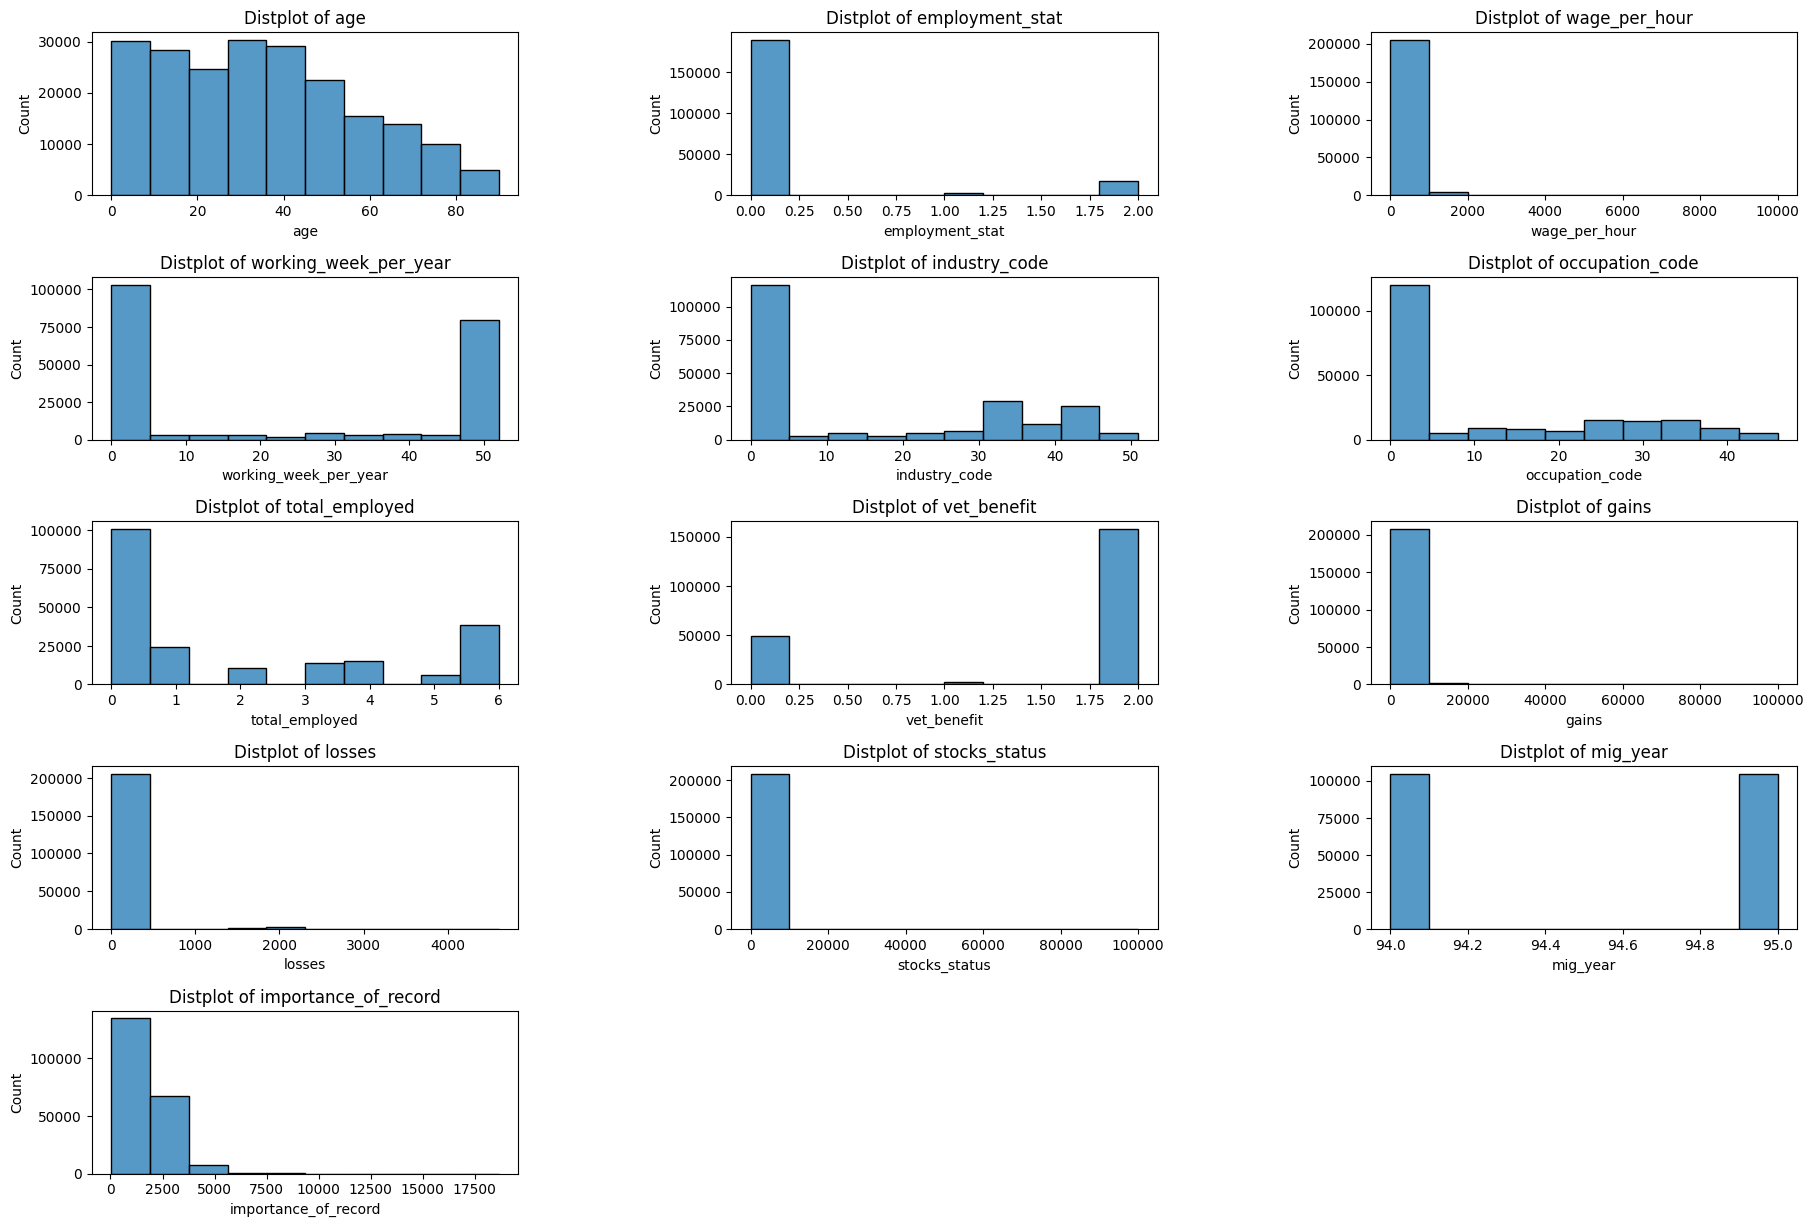

time: 14.3 s (started: 2024-03-05 11:42:05 +00:00)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your DataFrame containing the data

plt.figure(1, figsize=(22, 18))
n = 0
for x in df.columns:
    if df[x].dtype in ['int64', 'float64']:  # Check if the column is numeric
        n += 1
        plt.subplot(6, 3, n)
        plt.subplots_adjust(hspace=0.5, wspace=0.5)
        sns.histplot(df[x], bins=10)  # Use histplot instead of distplot
        plt.title('Distplot of {}'.format(x))

plt.show()


#**Data Pre-Processing**

The following operations were performed on the dataset:

1. **Categorical Variables and Non-Categorical Variables:** The dataset is divided into two subsets based on categorical and non-categorical variables.

2. **Missing Data Information:** The code calculates and prints the number of missing values for each variable and record.

3. **Missing Data Treatment:** Missing categorical data is imputed using the most frequent value, while missing non-categorical data is also imputed using the most frequent value.

4. **Missing Data Exclusion:** Empty records and variables are excluded from the dataset.

5. **Numeric Coding of Data:** Categorical data is encoded numerically using the Ordinal Encoder from scikit-learn.

6. **Boxplot for Outlier Detection:** Boxplots are generated for each non-categorical variable to visualize the presence of outliers.

7. **Data Transformation & Rescaling:** Non-categorical variables are normalized using Robust Scaling to handle outliers.

8. **Data Bifurcation:** The preprocessed dataset is split into training and testing datasets.

Overall, the code demonstrates a comprehensive preprocessing pipeline for preparing the beer recipe dataset for further analysis or modeling.

In [ ]:
# Categorical Data [Nominal | Ordinal]
df_cat = df[['ID', 'gender', 'education', 'class', 'education_institute', 'marital_status', 'race', 'is_hispanic',
              'employment_commitment', 'unemployment_reason', 'is_labor_union', 'industry_code_main',
              'occupation_code_main', 'household_stat', 'household_summary', 'under_18_family',
              'veterans_admin_questionnaire', 'tax_status', 'citizenship', 'country_of_birth_own',
              'country_of_birth_father', 'country_of_birth_mother', 'migration_code_change_in_msa',
              'migration_prev_sunbelt', 'migration_code_move_within_reg', 'migration_code_change_in_reg',
              'residence_1_year_ago', 'old_residence_reg', 'old_residence_state', 'income_above_limit']]

# Non-Categorical Data
df_noncat = df[['ID','age', 'employment_stat', 'wage_per_hour', 'working_week_per_year', 'industry_code', 'occupation_code','total_employed', 'vet_benefit', 'gains', 'losses', 'stocks_status', 'mig_year', 'importance_of_record']]


time: 135 ms (started: 2024-03-05 11:42:19 +00:00)


In [ ]:
variable_missing_data = df.isna().sum(); variable_missing_data # Variable-wise Missing Data Information

ID                                     0
age                                    0
gender                                 0
education                              0
class                             105245
education_institute               196197
marital_status                         0
race                                   0
is_hispanic                            0
employment_commitment                  0
unemployment_reason               202979
employment_stat                        0
wage_per_hour                          0
is_labor_union                    189420
working_week_per_year                  0
industry_code                          0
industry_code_main                     0
occupation_code                        0
occupation_code_main              105694
total_employed                         0
household_stat                         0
household_summary                      0
under_18_family                   151654
veterans_admin_questionnaire      207415
vet_benefit     

time: 907 ms (started: 2024-03-05 11:42:19 +00:00)


In [ ]:
record_missing_data = df.isna().sum(axis=1).sort_values(ascending=False).head(5); record_missing_data # Record-wise Missing Data Information (Top 5)

99515     14
159063    14
109841    14
198149    14
152827    14
dtype: int64

time: 958 ms (started: 2024-03-05 11:42:20 +00:00)


In [ ]:

si_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent') # Strategy = median [When Odd Number of Categories Exists]
si_cat_fit = si_cat.fit_transform(df_cat)
df_cat_mdi = pd.DataFrame(si_cat_fit, columns=df_cat.columns); df_cat_mdi # Missing Categorical Data Imputed Subset
df_cat_mdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   ID                              209499 non-null  object
 1   gender                          209499 non-null  object
 2   education                       209499 non-null  object
 3   class                           209499 non-null  object
 4   education_institute             209499 non-null  object
 5   marital_status                  209499 non-null  object
 6   race                            209499 non-null  object
 7   is_hispanic                     209499 non-null  object
 8   employment_commitment           209499 non-null  object
 9   unemployment_reason             209499 non-null  object
 10  is_labor_union                  209499 non-null  object
 11  industry_code_main              209499 non-null  object
 12  occupation_code_main          

In [ ]:
si_noncat = SimpleImputer(missing_values=np.nan, strategy='most_frequent') # Other Strategy : mean | median | most_frequent | constant
si_noncat_fit = si_noncat.fit_transform(df_noncat)
df_noncat_mdi_si = pd.DataFrame(si_noncat_fit, columns=df_noncat.columns); df_noncat_mdi_si # Missing Non-Categorical Data Imputed Subset using Simple Imputer
df_noncat_mdi_si.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   ID                     209499 non-null  object
 1   age                    209499 non-null  object
 2   employment_stat        209499 non-null  object
 3   wage_per_hour          209499 non-null  object
 4   working_week_per_year  209499 non-null  object
 5   industry_code          209499 non-null  object
 6   occupation_code        209499 non-null  object
 7   total_employed         209499 non-null  object
 8   vet_benefit            209499 non-null  object
 9   gains                  209499 non-null  object
 10  losses                 209499 non-null  object
 11  stocks_status          209499 non-null  object
 12  mig_year               209499 non-null  object
 13  importance_of_record   209499 non-null  object
dtypes: object(14)
memory usage: 22.4+ MB
time: 1.43 s (s

In [ ]:
# Excluding Empty Records (If Any)
df_cat_mdi.dropna(axis=0, how='all', inplace=True) # Categorical Data Subset
df_noncat_mdi_si.dropna(axis=0, how='all', inplace=True) # Non-Categorical Data Subset
#df_noncat_mdi_ki.dropna(axis=0, how='all', inplace=True) # Non-Categorical Data Subset


time: 1.46 s (started: 2024-03-05 11:42:25 +00:00)


In [ ]:
# Excluding Empty Variables (If Any)
df_cat_mdi.dropna(axis=1, how='all', inplace=True) # Categorical Data Subset
df_noncat_mdi_si.dropna(axis=1, how='all', inplace=True) # Non-Categorical Data Subset
#df_noncat_mdi_ki.dropna(axis=1, how='all', inplace=True) # Non-Categorical Data Subset

time: 1.46 s (started: 2024-03-05 11:42:26 +00:00)


In [ ]:
# Using Scikit Learn : Ordinal Encoder (Superior)
oe = OrdinalEncoder()
oe_fit = oe.fit_transform(df_cat_mdi)
df_cat_code_oe = pd.DataFrame(oe_fit, columns=['ID_code', 'gender_code', 'education_code', 'class_code', 'education_institute_code',
                                               'marital_status_code', 'race_code', 'is_hispanic_code', 'employment_commitment_code',
                                               'unemployment_reason_code', 'is_labor_union_code', 'industry_code_main_code',
                                               'occupation_code_main_code', 'household_stat_code', 'household_summary_code',
                                               'under_18_family_code', 'veterans_admin_questionnaire_code', 'tax_status_code',
                                               'citizenship_code', 'country_of_birth_own_code', 'country_of_birth_father_code',
                                               'country_of_birth_mother_code', 'migration_code_change_in_msa_code',
                                               'migration_prev_sunbelt_code', 'migration_code_move_within_reg_code',
                                               'migration_code_change_in_reg_code', 'residence_1_year_ago_code',
                                               'old_residence_reg_code', 'old_residence_state_code', 'income_above_limit_code'])
df_cat_code_oe
df_cat_mdt_code_oe = df_cat_mdi.join(df_cat_code_oe); df_cat_mdt_code_oe # (Missing Data Treated) Numeric Coded Categorical Dataset using Scikit Learn Ordinal Encoder
#df_cat_mdt_code_oe = pd.merge(df_cat_mdt_code, df_cat_code_oe, left_index=True, right_index=True); df_cat_mdt_code_oe

,ID,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,unemployment_reason,...,country_of_birth_father_code,country_of_birth_mother_code,migration_code_change_in_msa_code,migration_prev_sunbelt_code,migration_code_move_within_reg_code,migration_code_change_in_reg_code,residence_1_year_ago_code,old_residence_reg_code,old_residence_state_code,income_above_limit_code
0,ID_TZ0000,Female,High school graduate,Private,High school,Widowed,White,All other,Not in labor force,Other job loser,...,42.0,42.0,0.0,0.0,0.0,0.0,1.0,3.0,6.0,1.0
1,ID_TZ0001,Female,High school graduate,Private,High school,Widowed,White,All other,Children or Armed Forces,Other job loser,...,42.0,42.0,8.0,0.0,8.0,7.0,1.0,3.0,6.0,1.0
2,ID_TZ0002,Male,12th grade no diploma,Federal government,High school,Never married,Black,All other,Children or Armed Forces,Other job loser,...,42.0,42.0,8.0,0.0,8.0,7.0,1.0,3.0,6.0,1.0
3,ID_TZ0003,Female,Children,Private,High school,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,Other job loser,...,19.0,19.0,8.0,0.0,8.0,7.0,1.0,3.0,6.0,1.0
4,ID_TZ0004,Male,High school graduate,Private,High school,Married-civilian spouse present,White,All other,Not in labor force,Other job loser,...,42.0,42.0,0.0,0.0,0.0,0.0,1.0,3.0,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209494,ID_TZ99995,Female,7th and 8th grade,Private,High school,Never married,White,All other,Not in labor force,Other job loser,...,42.0,42.0,0.0,0.0,0.0,0.0,1.0,3.0,6.0,1.0
209495,ID_TZ99996,Male,Bachelors degree(BA AB BS),Private,High school,Married-civilian spouse present,White,All other,Not in labor force,Other job loser,...,42.0,2.0,0.0,0.0,0.0,0.0,1.0,3.0,6.0,1.0
209496,ID_TZ99997,Female,Children,Private,High school,Never married,White,All other,Children or Armed Forces,Other job loser,...,42.0,42.0,0.0,0.0,0.0,0.0,1.0,3.0,6.0,1.0
209497,ID_TZ99998,Female,Some college but no degree,Private,High school,Married-civilian spouse present,White,All other,Children or Armed Forces,Other job loser,...,42.0,42.0,8.0,0.0,8.0,7.0,1.0,3.0,6.0,1.0


time: 8.07 s (started: 2024-03-05 11:42:28 +00:00)


#**Data Exploration**

**1. Plotting Frequency of Non-Categorical Variables**

Visualizations are used to understand the frequency distribution of non-categorical variables such as age, income, and education.

**2. Distribution of Married and Non-Married Applicants**

Analysis is conducted to compare the distribution of married and non-married applicants in the dataset.

**3. Distribution of House Ownership**

The distribution of house ownership status among applicants is examined to understand their housing situation.

**4. Occupation Distribution**

A breakdown of occupations among applicants is provided to gain insights into their employment status.

**5. Word Cloud for Occupations**

A word cloud visualization is created to highlight the most common occupations among applicants.

**6. Box Plot of Non-Categorical Variables**

Box plots are utilized to visualize the distribution and identify potential outliers in non-categorical variables.


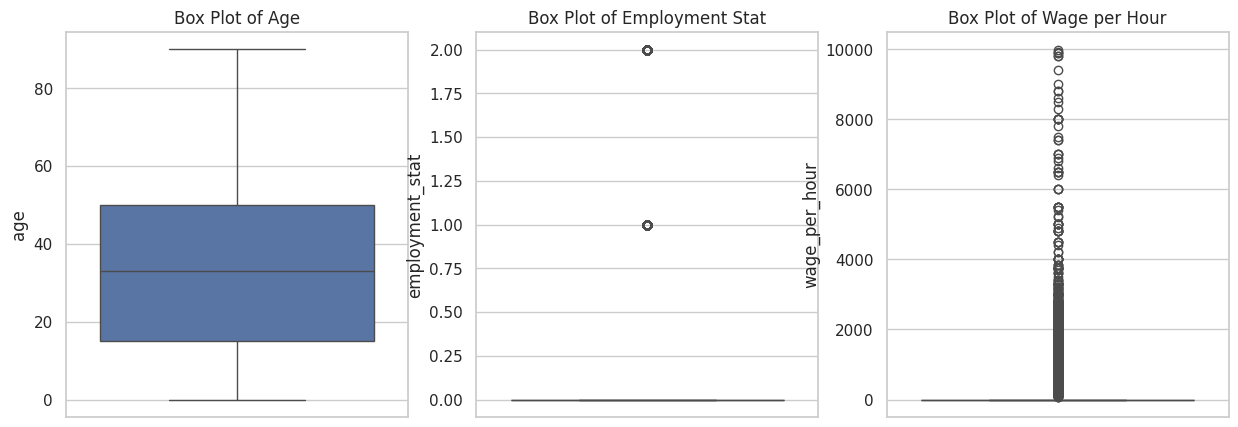

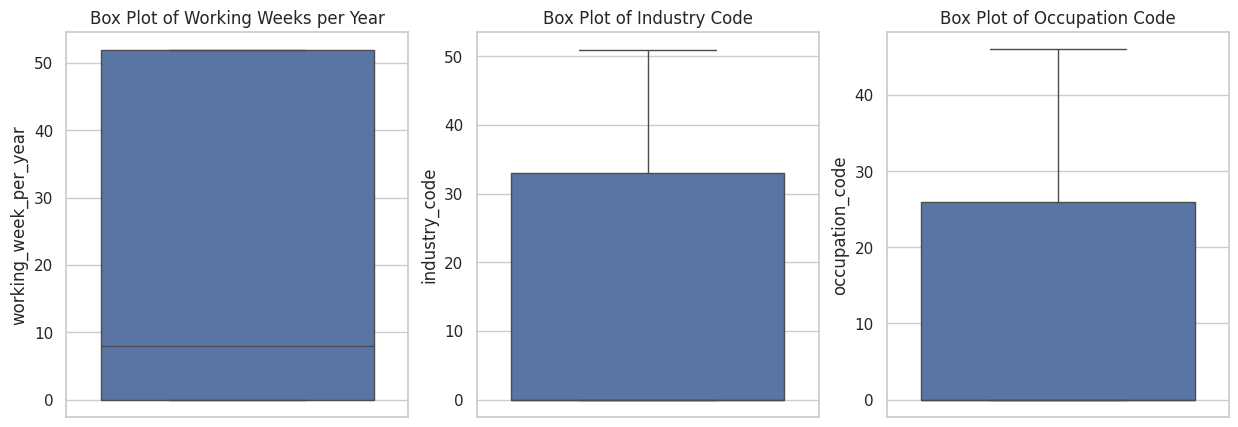

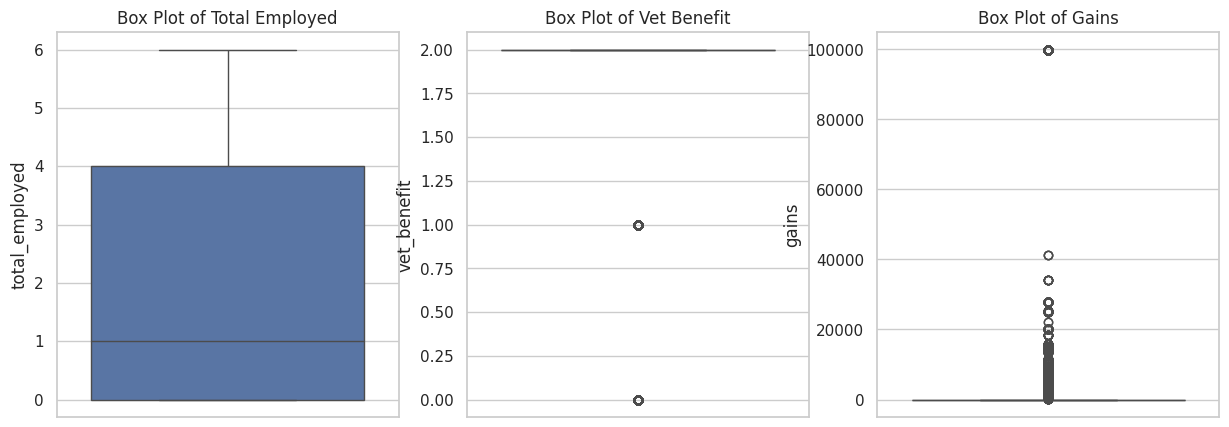

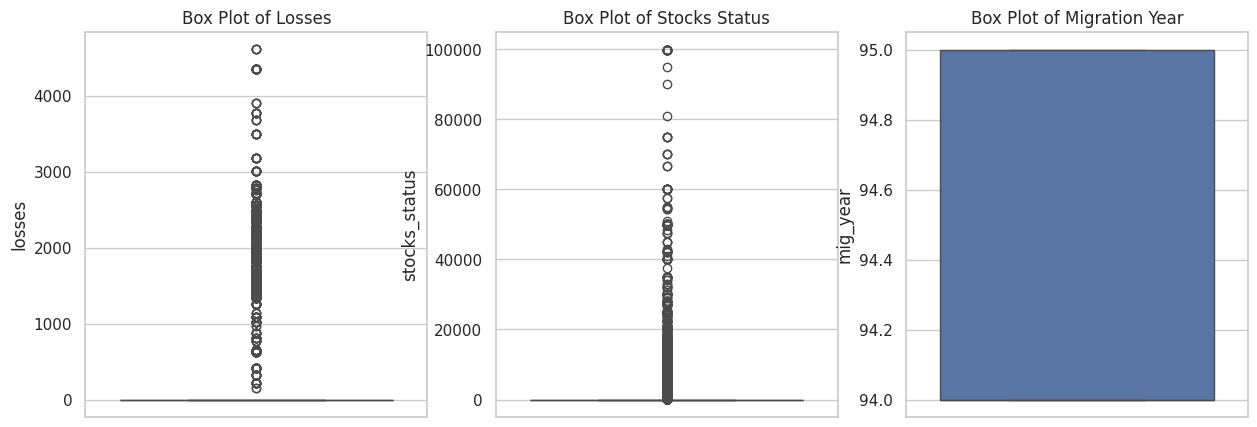

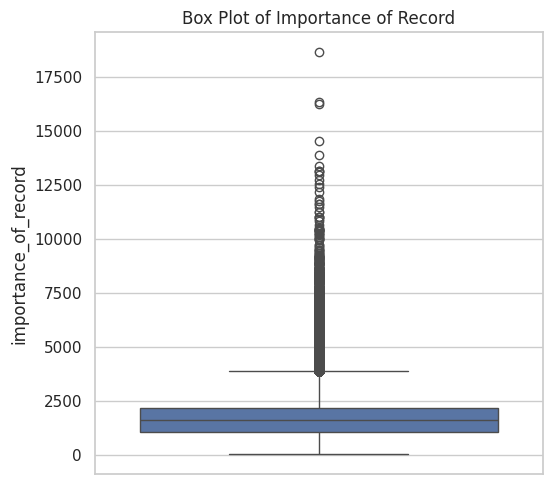

time: 9.92 s (started: 2024-03-05 11:42:36 +00:00)


In [ ]:
# Set the style of the seaborn
sns.set(style="whitegrid")

# Create subplots
plt.figure(figsize=(15, 5))

# Box plot for 'age'
plt.subplot(1, 3, 1)
sns.boxplot(y=df_noncat['age'])
plt.title('Box Plot of Age')

# Box plot for 'employment_stat'
plt.subplot(1, 3, 2)
sns.boxplot(y=df_noncat['employment_stat'])
plt.title('Box Plot of Employment Stat')

# Box plot for 'wage_per_hour'
plt.subplot(1, 3, 3)
sns.boxplot(y=df_noncat['wage_per_hour'])
plt.title('Box Plot of Wage per Hour')

# Create subplots for the next set of variables
plt.figure(figsize=(15, 5))

# Box plot for 'working_week_per_year'
plt.subplot(1, 3, 1)
sns.boxplot(y=df_noncat['working_week_per_year'])
plt.title('Box Plot of Working Weeks per Year')

# Box plot for 'industry_code'
plt.subplot(1, 3, 2)
sns.boxplot(y=df_noncat['industry_code'])
plt.title('Box Plot of Industry Code')

# Box plot for 'occupation_code'
plt.subplot(1, 3, 3)
sns.boxplot(y=df_noncat['occupation_code'])
plt.title('Box Plot of Occupation Code')

# Create subplots for the next set of variables
plt.figure(figsize=(15, 5))

# Box plot for 'total_employed'
plt.subplot(1, 3, 1)
sns.boxplot(y=df_noncat['total_employed'])
plt.title('Box Plot of Total Employed')

# Box plot for 'vet_benefit'
plt.subplot(1, 3, 2)
sns.boxplot(y=df_noncat['vet_benefit'])
plt.title('Box Plot of Vet Benefit')

# Box plot for 'gains'
plt.subplot(1, 3, 3)
sns.boxplot(y=df_noncat['gains'])
plt.title('Box Plot of Gains')

# Create subplots for the next set of variables
plt.figure(figsize=(15, 5))

# Box plot for 'losses'
plt.subplot(1, 3, 1)
sns.boxplot(y=df_noncat['losses'])
plt.title('Box Plot of Losses')

# Box plot for 'stocks_status'
plt.subplot(1, 3, 2)
sns.boxplot(y=df_noncat['stocks_status'])
plt.title('Box Plot of Stocks Status')

# Box plot for 'mig_year'
plt.subplot(1, 3, 3)
sns.boxplot(y=df_noncat['mig_year'])
plt.title('Box Plot of Migration Year')

# Create subplots for the next set of variables
plt.figure(figsize=(15, 5))

# Box plot for 'importance_of_record'
plt.subplot(1, 3, 1)
sns.boxplot(y=df_noncat['importance_of_record'])
plt.title('Box Plot of Importance of Record')

# Show the plots
plt.tight_layout()
plt.show()


In [ ]:
# Standardization
ss = StandardScaler()
ss_fit = ss.fit_transform(df_noncat_mdi_si[['employment_stat', 'wage_per_hour', 'vet_benefit', 'gains', 'losses', 'stocks_status','importance_of_record']])
df_noncat_std = pd.DataFrame(ss_fit, columns=['employment_stat_std', 'wage_per_hour_std', 'vet_benefit_std', 'gains_std', 'losses_std', 'stocks_status_std','importance_of_record_std']); df_noncat_std

,employment_stat_std,wage_per_hour_std,vet_benefit_std,gains_std,losses_std,stocks_status_std,importance_of_record_std
0,-0.318165,-0.200297,0.569014,-0.092823,-0.136406,0.049820,0.039025
1,-0.318165,-0.200297,0.569014,-0.092823,-0.136406,-0.099436,0.628655
2,-0.318165,1.606344,0.569014,-0.092823,-0.136406,-0.099436,-0.047680
3,-0.318165,-0.200297,-1.781576,-0.092823,-0.136406,-0.099436,-0.362228
4,-0.318165,-0.200297,0.569014,-0.092823,-0.136406,-0.099436,-0.160813
...,...,...,...,...,...,...,...
209494,-0.318165,-0.200297,0.569014,-0.092823,-0.136406,-0.099436,0.431629
209495,-0.318165,-0.200297,0.569014,-0.092823,-0.136406,-0.063144,-0.714493
209496,-0.318165,-0.200297,-1.781576,-0.092823,-0.136406,-0.099436,-0.953515
209497,-0.318165,2.329001,0.569014,-0.092823,-0.136406,-0.099436,1.797357


time: 188 ms (started: 2024-03-05 11:42:46 +00:00)


In [ ]:
# Pre-Processed Categorical Data Subset
df_cat_ppd = df_cat_mdt_code_oe.copy(); df_cat_ppd # Preferred Data Subset
#df_cat_ppd = df_cat_mdt_code_pd.copy(); df_cat_ppd
#df_cat_ppd = df_cat_mdt_code_le.copy(); df_cat_ppd

,ID,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,unemployment_reason,...,country_of_birth_father_code,country_of_birth_mother_code,migration_code_change_in_msa_code,migration_prev_sunbelt_code,migration_code_move_within_reg_code,migration_code_change_in_reg_code,residence_1_year_ago_code,old_residence_reg_code,old_residence_state_code,income_above_limit_code
0,ID_TZ0000,Female,High school graduate,Private,High school,Widowed,White,All other,Not in labor force,Other job loser,...,42.0,42.0,0.0,0.0,0.0,0.0,1.0,3.0,6.0,1.0
1,ID_TZ0001,Female,High school graduate,Private,High school,Widowed,White,All other,Children or Armed Forces,Other job loser,...,42.0,42.0,8.0,0.0,8.0,7.0,1.0,3.0,6.0,1.0
2,ID_TZ0002,Male,12th grade no diploma,Federal government,High school,Never married,Black,All other,Children or Armed Forces,Other job loser,...,42.0,42.0,8.0,0.0,8.0,7.0,1.0,3.0,6.0,1.0
3,ID_TZ0003,Female,Children,Private,High school,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,Other job loser,...,19.0,19.0,8.0,0.0,8.0,7.0,1.0,3.0,6.0,1.0
4,ID_TZ0004,Male,High school graduate,Private,High school,Married-civilian spouse present,White,All other,Not in labor force,Other job loser,...,42.0,42.0,0.0,0.0,0.0,0.0,1.0,3.0,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209494,ID_TZ99995,Female,7th and 8th grade,Private,High school,Never married,White,All other,Not in labor force,Other job loser,...,42.0,42.0,0.0,0.0,0.0,0.0,1.0,3.0,6.0,1.0
209495,ID_TZ99996,Male,Bachelors degree(BA AB BS),Private,High school,Married-civilian spouse present,White,All other,Not in labor force,Other job loser,...,42.0,2.0,0.0,0.0,0.0,0.0,1.0,3.0,6.0,1.0
209496,ID_TZ99997,Female,Children,Private,High school,Never married,White,All other,Children or Armed Forces,Other job loser,...,42.0,42.0,0.0,0.0,0.0,0.0,1.0,3.0,6.0,1.0
209497,ID_TZ99998,Female,Some college but no degree,Private,High school,Married-civilian spouse present,White,All other,Children or Armed Forces,Other job loser,...,42.0,42.0,8.0,0.0,8.0,7.0,1.0,3.0,6.0,1.0


time: 345 ms (started: 2024-03-05 11:42:46 +00:00)


In [ ]:
# Pre-Processed Non-Categorical Data Subset
df_noncat_ppd = df_noncat_std.copy(); df_noncat_ppd # Preferred Data Subset
#df_noncat_ppd = df_noncat_mdt_rn.copy(); df_noncat_ppd
#df_noncat_ppd = df_noncat_mdt_std.copy(); df_noncat_ppd
#df_noncat_ppd = df_noncat_mdt_lt.copy(); df_noncat_ppd

,employment_stat_std,wage_per_hour_std,vet_benefit_std,gains_std,losses_std,stocks_status_std,importance_of_record_std
0,-0.318165,-0.200297,0.569014,-0.092823,-0.136406,0.049820,0.039025
1,-0.318165,-0.200297,0.569014,-0.092823,-0.136406,-0.099436,0.628655
2,-0.318165,1.606344,0.569014,-0.092823,-0.136406,-0.099436,-0.047680
3,-0.318165,-0.200297,-1.781576,-0.092823,-0.136406,-0.099436,-0.362228
4,-0.318165,-0.200297,0.569014,-0.092823,-0.136406,-0.099436,-0.160813
...,...,...,...,...,...,...,...
209494,-0.318165,-0.200297,0.569014,-0.092823,-0.136406,-0.099436,0.431629
209495,-0.318165,-0.200297,0.569014,-0.092823,-0.136406,-0.063144,-0.714493
209496,-0.318165,-0.200297,-1.781576,-0.092823,-0.136406,-0.099436,-0.953515
209497,-0.318165,2.329001,0.569014,-0.092823,-0.136406,-0.099436,1.797357


time: 20.4 ms (started: 2024-03-05 11:42:46 +00:00)


In [ ]:
# Pre-Processed Dataset
df_ppd = pd.merge(df_cat_ppd, df_noncat, on='ID')

# Display the Pre-Processed Dataset
df_ppd

,ID,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,unemployment_reason,...,working_week_per_year,industry_code,occupation_code,total_employed,vet_benefit,gains,losses,stocks_status,mig_year,importance_of_record
0,ID_TZ0000,Female,High school graduate,Private,High school,Widowed,White,All other,Not in labor force,Other job loser,...,52,0,0,2,2,0,0,292,95,1779.74
1,ID_TZ0001,Female,High school graduate,Private,High school,Widowed,White,All other,Children or Armed Forces,Other job loser,...,0,0,0,0,2,0,0,0,94,2366.75
2,ID_TZ0002,Male,12th grade no diploma,Federal government,High school,Never married,Black,All other,Children or Armed Forces,Other job loser,...,15,41,26,4,2,0,0,0,94,1693.42
3,ID_TZ0003,Female,Children,Private,High school,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,Other job loser,...,0,0,0,0,0,0,0,0,94,1380.27
4,ID_TZ0004,Male,High school graduate,Private,High school,Married-civilian spouse present,White,All other,Not in labor force,Other job loser,...,0,0,0,0,2,0,0,0,95,1580.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209494,ID_TZ99995,Female,7th and 8th grade,Private,High school,Never married,White,All other,Not in labor force,Other job loser,...,0,0,0,0,2,0,0,0,95,2170.60
209495,ID_TZ99996,Male,Bachelors degree(BA AB BS),Private,High school,Married-civilian spouse present,White,All other,Not in labor force,Other job loser,...,0,0,0,0,2,0,0,71,95,1029.57
209496,ID_TZ99997,Female,Children,Private,High school,Never married,White,All other,Children or Armed Forces,Other job loser,...,0,0,0,0,0,0,0,0,95,791.61
209497,ID_TZ99998,Female,Some college but no degree,Private,High school,Married-civilian spouse present,White,All other,Children or Armed Forces,Other job loser,...,52,32,42,4,2,0,0,0,94,3530.26


time: 541 ms (started: 2024-03-05 11:42:46 +00:00)


In [ ]:
df_ppd1 = df_ppd.drop(['ID_code','ID','gender', 'education', 'class', 'education_institute','marital_status', 'race', 'is_hispanic', 'employment_commitment','unemployment_reason','is_labor_union','industry_code_main','occupation_code_main','household_stat','household_summary','under_18_family','veterans_admin_questionnaire','tax_status','citizenship','country_of_birth_own','country_of_birth_father',
       'country_of_birth_mother', 'migration_code_change_in_msa', 'migration_prev_sunbelt', 'migration_code_move_within_reg','migration_code_change_in_reg','residence_1_year_ago','old_residence_reg', 'old_residence_state', 'income_above_limit' ], axis=1)
df_ppd1

,gender_code,education_code,class_code,education_institute_code,marital_status_code,race_code,is_hispanic_code,employment_commitment_code,unemployment_reason_code,is_labor_union_code,...,working_week_per_year,industry_code,occupation_code,total_employed,vet_benefit,gains,losses,stocks_status,mig_year,importance_of_record
0,0.0,12.0,3.0,1.0,6.0,4.0,0.0,2.0,3.0,0.0,...,52,0,0,2,2,0,0,292,95,1779.74
1,0.0,12.0,3.0,1.0,6.0,4.0,0.0,0.0,3.0,0.0,...,0,0,0,0,2,0,0,0,94,2366.75
2,1.0,2.0,0.0,1.0,4.0,2.0,0.0,0.0,3.0,0.0,...,15,41,26,4,2,0,0,0,94,1693.42
3,0.0,10.0,3.0,1.0,4.0,1.0,0.0,0.0,3.0,0.0,...,0,0,0,0,0,0,0,0,94,1380.27
4,1.0,12.0,3.0,1.0,2.0,4.0,0.0,2.0,3.0,0.0,...,0,0,0,0,2,0,0,0,95,1580.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209494,0.0,5.0,3.0,1.0,4.0,4.0,0.0,2.0,3.0,0.0,...,0,0,0,0,2,0,0,0,95,2170.60
209495,1.0,9.0,3.0,1.0,2.0,4.0,0.0,2.0,3.0,0.0,...,0,0,0,0,2,0,0,71,95,1029.57
209496,0.0,10.0,3.0,1.0,4.0,4.0,0.0,0.0,3.0,0.0,...,0,0,0,0,0,0,0,0,95,791.61
209497,0.0,16.0,3.0,1.0,2.0,4.0,0.0,0.0,3.0,0.0,...,52,32,42,4,2,0,0,0,94,3530.26


time: 107 ms (started: 2024-03-05 11:42:47 +00:00)


In [ ]:
df_ppd1.columns

Index(['gender_code', 'education_code', 'class_code',
       'education_institute_code', 'marital_status_code', 'race_code',
       'is_hispanic_code', 'employment_commitment_code',
       'unemployment_reason_code', 'is_labor_union_code',
       'industry_code_main_code', 'occupation_code_main_code',
       'household_stat_code', 'household_summary_code', 'under_18_family_code',
       'veterans_admin_questionnaire_code', 'tax_status_code',
       'citizenship_code', 'country_of_birth_own_code',
       'country_of_birth_father_code', 'country_of_birth_mother_code',
       'migration_code_change_in_msa_code', 'migration_prev_sunbelt_code',
       'migration_code_move_within_reg_code',
       'migration_code_change_in_reg_code', 'residence_1_year_ago_code',
       'old_residence_reg_code', 'old_residence_state_code',
       'income_above_limit_code', 'age', 'employment_stat', 'wage_per_hour',
       'working_week_per_year', 'industry_code', 'occupation_code',
       'total_employed', 'v

time: 5.57 ms (started: 2024-03-05 11:42:47 +00:00)


In [ ]:
train_df, test_df = train_test_split(df_ppd1, test_size=0.25, random_state=1234)
train_df # Training Dataset
test_df # Testing Dataset

,gender_code,education_code,class_code,education_institute_code,marital_status_code,race_code,is_hispanic_code,employment_commitment_code,unemployment_reason_code,is_labor_union_code,...,working_week_per_year,industry_code,occupation_code,total_employed,vet_benefit,gains,losses,stocks_status,mig_year,importance_of_record
188324,1.0,16.0,3.0,1.0,2.0,4.0,0.0,5.0,3.0,0.0,...,52,35,17,4,2,0,0,200,95,1682.84
194425,1.0,10.0,3.0,1.0,4.0,2.0,0.0,0.0,3.0,0.0,...,0,0,0,0,0,0,0,0,94,2085.38
55980,0.0,12.0,3.0,1.0,2.0,4.0,0.0,5.0,3.0,0.0,...,52,33,19,1,2,0,0,0,95,1748.40
179212,1.0,10.0,3.0,1.0,4.0,4.0,0.0,0.0,3.0,0.0,...,0,0,0,0,0,0,0,0,95,2336.92
114853,1.0,6.0,3.0,1.0,4.0,4.0,0.0,2.0,3.0,0.0,...,0,0,0,0,2,0,0,0,95,1305.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182179,1.0,2.0,3.0,1.0,2.0,3.0,5.0,1.0,3.0,0.0,...,52,6,34,3,2,0,0,0,95,1097.14
36046,1.0,10.0,3.0,1.0,4.0,4.0,0.0,0.0,3.0,0.0,...,0,0,0,0,0,0,0,0,95,1691.74
144368,0.0,12.0,3.0,1.0,2.0,4.0,0.0,0.0,3.0,0.0,...,0,0,0,0,2,0,0,2000,94,1871.75
75763,0.0,16.0,3.0,1.0,2.0,4.0,0.0,0.0,3.0,0.0,...,48,12,35,6,2,0,0,12200,94,808.48


time: 173 ms (started: 2024-03-05 11:42:47 +00:00)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

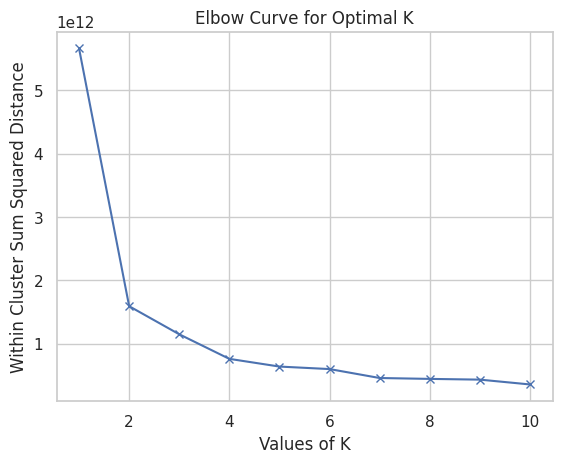

time: 1min 50s (started: 2024-03-05 11:42:47 +00:00)


In [ ]:
wcssd = [] # Within-Cluster-Sum-Squared-Distance
nr_clus = range(1,11) # Number of Clusters
for k in nr_clus:
    kmeans = kmclus(n_clusters=k, init='random', random_state=111)
    kmeans.fit(df_ppd1)
    wcssd.append(kmeans.inertia_)
plt.plot(nr_clus, wcssd, marker='x')
plt.xlabel('Values of K')
plt.ylabel('Within Cluster Sum Squared Distance')
plt.title('Elbow Curve for Optimal K')
plt.show()

#K-means clustering

1. **Simple and Fast**: K-means is computationally efficient and relatively easy to understand and implement. It works well with large datasets, making it suitable for analysis even when dealing with a significant amount of data.

2. **Scalability**: K-means clustering is scalable to a large number of samples and has been used in many large-scale data processing scenarios.

3. **Interpretability**: K-means produces clusters that are easy to interpret. Each cluster is represented by its centroid, which is the mean of all the data points assigned to that cluster. This centroid can provide insight into the characteristics of the cluster.

4. **Versatility**: K-means can be applied to various types of data and can handle both numerical and categorical variables (after appropriate preprocessing). This versatility makes it applicable to a wide range of datasets.

5. **Well-suited for Convex Clusters**: K-means performs well when clusters are spherical or close to spherical in shape. It tries to minimize the within-cluster variance, which makes it suitable for convex clusters.

6. **Initial Centroid Selection**: While the performance of K-means can be sensitive to the initial choice of centroids, there are strategies to mitigate this issue, such as multiple initializations with different seeds and more advanced methods like k-means++.

However, it's essential to consider potential limitations as well:

1. **Sensitive to Initial Centroid Selection**: The results of K-means clustering can be sensitive to the initial placement of centroids. Different initializations may lead to different results.

2. **Assumes Spherical Clusters**: K-means assumes that clusters are spherical and isotropic, which may not always hold true for complex datasets with irregularly shaped clusters.

3. **Number of Clusters (K) Selection**: Determining the appropriate number of clusters (K) can be challenging and may require domain knowledge or additional validation techniques, such as the elbow method or silhouette analysis.

4. **Sensitive to Outliers**: K-means is sensitive to outliers, as it tries to minimize the within-cluster variance. Outliers can significantly impact the positions of cluster centroids.

5. **Equal Variance Among Clusters**: K-means assumes that clusters have equal variance, which may not always be the case in practice.

Overall, while K-means clustering has its limitations, it can still be a valuable tool for exploratory analysis and pattern discovery in your dataset, especially if the assumptions of the algorithm are met and appropriate preprocessing steps are taken.

## Assessment Criteria

1. **Silhouette Score (SS)**:
   - The Silhouette Score is a measure of how similar an object is to its own cluster compared to other clusters.
   - It quantifies the separation between clusters. A high Silhouette Score indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
   - The Silhouette Score ranges from -1 to 1, where a high value indicates that the object is well-clustered, a value near 0 indicates overlapping clusters, and negative values suggest that the object may have been assigned to the wrong cluster.
   - In the context of K-means clustering, the average Silhouette Score across all data points can be used to evaluate the quality of clustering. Higher average Silhouette Scores indicate better-defined clusters.

2. **Davies-Bouldin Index (DBI)**:
   - The Davies-Bouldin Index is a measure of cluster compactness and separation.
   - It evaluates the average similarity between each cluster and its most similar cluster, weighted by the cluster sizes.
   - A lower DBI indicates better clustering, with clusters that are well-separated from each other and internally compact.
   - The DBI considers both intra-cluster and inter-cluster distances, aiming to minimize intra-cluster distance while maximizing inter-cluster distance.
   - Like the Silhouette Score, the Davies-Bouldin Index is used to assess the quality of clustering algorithms, with lower values indicating better-defined clusters.



# **K-means Clustering Analysis Report**

### **Introduction**
K-means clustering is a popular unsupervised machine learning algorithm used for partitioning data into distinct clusters. In this report, we apply K-means clustering to the provided dataset to identify underlying patterns and group similar data points together.

### **Methodology**
The K-means clustering algorithm was applied with various numbers of clusters (2, 3, 4, and 5). Each iteration involved initializing centroids and iteratively updating them to minimize the within-cluster variance. Evaluation metrics such as Silhouette Score and Davies-Bouldin Index were computed to assess the quality of clustering.

### **Results**

#### **1. K-means with 2 Clusters**
- **Silhouette Score (SS)**: 0.9814
- **Davies-Bouldin Index (DBI)**: 0.0839
- **Interpretation**: The clusters are well-separated with high cohesion within clusters. The clustering performance is exceptional, indicating robust and reliable clusters.

####**2. K-means with 3 Clusters**
- **Silhouette Score (SS)**: 0.8846
- **Davies-Bouldin Index (DBI)**: 0.6491
- **Interpretation**: The clusters are reasonably well-separated, although the clustering performance is slightly lower compared to 2 clusters.

#### **3. K-means with 4 Clusters**
- **Silhouette Score (SS)**: 0.8700
- **Davies-Bouldin Index (DBI)**: 0.4740
- **Interpretation**: The clusters are well-separated and compact, indicating good clustering performance.

####**4. K-means with 5 Clusters**
- **Silhouette Score (SS)**: 0.4827
- **Davies-Bouldin Index (DBI)**: 0.6254
- **Interpretation**: The clusters are reasonably well-separated, although the clustering performance is lower compared to previous configurations.

### **Conclusion**
Overall, the K-means clustering algorithm performed well on the dataset, producing distinct and well-separated clusters. The evaluation metrics indicate strong clustering performance, particularly with 2 clusters.


####**Clusters Profile**




**Cluster 0:**

Gender: Predominantly Male (0.48)

Education: Approximately High School Graduates (10.03)

Marital Status: Mostly Married (3.01)

Race: Diverse, with a slight majority of White (3.64)

Employment Commitment: Moderate (0.69)

Unemployment Reason: Minimal (2.99)

Stocks Status: Moderate (185.72)

Income Gains: Moderate (241.17)

Income Losses: Moderate (36.95)

Cluster Label: 1


**Cluster 1:**

Gender: Predominantly Female (0.79)

Education: Higher Education (Bachelor's or above) (11.97)

Marital Status: Mixed, but leaning towards Single (2.10)

Race: Diverse, with a slight majority of White (3.80)

Employment Commitment: High (0.85)

Unemployment Reason: Minimal (2.99)

Stocks Status: High (4697.81)

Income Gains: High (99999.00)

Income Losses: Minimal (0.00)

Cluster Label: 2


**Interpretation:**

Cluster 0 represents individuals who are typically male, with moderate levels of education, predominantly married, and racially diverse. They exhibit moderate commitment to employment, with moderate income gains and losses. This cluster could potentially represent a segment of the population with stable employment and income.

Cluster 1 consists mostly of females with higher education levels, predominantly single, and racially diverse. They display high levels of employment commitment, with significantly higher income gains and minimal losses. This cluster might represent a group of highly educated, financially stable individuals, possibly professionals or executives.


**Conclusion:**

The analysis of cluster centroids reveals distinct demographic and socioeconomic profiles within the dataset. Understanding these clusters can aid in targeted marketing, resource allocation, or policy formulation tailored to the specific needs and characteristics of each segment.

In [ ]:
# Create K-Means Clusters [K=2]
km_2cluster = kmclus(n_clusters=2, init='random', random_state=333)
df_ppd1['Cluster_Label'] = km_2cluster.fit_predict(df_ppd1)
km_2cluster_model = df_ppd1['Cluster_Label'].values
km_2cluster_model

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

time: 3.91 s (started: 2024-03-05 11:45:15 +00:00)


In [ ]:
sscore_km_2cluster = sscore(df_ppd1, km_2cluster_model); print(sscore_km_2cluster)
dbscore_km_2cluster = dbscore(df_ppd1, km_2cluster_model); dbscore_km_2cluster

0.9813644635539094


0.08387625005162615

In [ ]:
# Create K-Means Clusters [K=3]
km_3cluster = kmclus(n_clusters=3, init='random', random_state=333)
df_ppd1['Cluster_Label'] = km_3cluster.fit_predict(df_ppd1)
km_3cluster_model = df_ppd1['Cluster_Label'].values
km_3cluster_model

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

time: 9.11 s (started: 2024-03-05 11:44:41 +00:00)


In [ ]:
sscore_km_3cluster = sscore(df_ppd1, km_3cluster_model); print(sscore_km_3cluster)
dbscore_km_3cluster = dbscore(df_ppd1, km_3cluster_model); dbscore_km_3cluster

0.8846269021000362


0.649085555019993

In [ ]:
# Create K-Means Clusters [K=4]
km_4cluster = kmclus(n_clusters=4, init='random', random_state=333)
df_ppd1['Cluster_Label'] = km_4cluster.fit_predict(df_ppd1)
km_4cluster_model = df_ppd1['Cluster_Label'].values
km_4cluster_model

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 3, 3, ..., 3, 3, 3], dtype=int32)

time: 6.31 s (started: 2024-03-05 11:44:50 +00:00)


In [ ]:
sscore_km_4cluster = sscore(df_ppd1, km_4cluster_model); print(sscore_km_4cluster)
dbscore_km_4cluster = dbscore(df_ppd1, km_4cluster_model); dbscore_km_4cluster

0.8700773749898048


0.47439826998072054

In [ ]:
# Create K-Means Clusters [K=5]
km_5cluster = kmclus(n_clusters=5, init='random', random_state=333)
df_ppd1['Cluster_Label'] = km_5cluster.fit_predict(df_ppd1)
km_5cluster_model = df_ppd1['Cluster_Label'].values
km_5cluster_model

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 0, 2, ..., 2, 0, 2], dtype=int32)

time: 8.56 s (started: 2024-03-05 12:48:06 +00:00)


In [ ]:
sscore_km_5cluster = sscore(df_ppd1, km_5cluster_model); print(sscore_km_5cluster)
dbscore_km_5cluster = dbscore(df_ppd1, km_5cluster_model); dbscore_km_5cluster

0.4827748641383104


0.6253577111459101

In [ ]:
cluster_centers = km_2cluster.cluster_centers_

# Convert centroids to DataFrame for better visualization
centroids_df = pd.DataFrame(cluster_centers, columns=df_ppd1.columns)
print("Centroids of Clusters:")
centroids_dfcluster_centers = km_2cluster.cluster_centers_

# Convert centroids to DataFrame for better visualization
centroids_df = pd.DataFrame(cluster_centers, columns=df_ppd1.columns)
print("Centroids of Clusters:")
centroids_df

Centroids of Clusters:
Centroids of Clusters:


,gender_code,education_code,class_code,education_institute_code,marital_status_code,race_code,is_hispanic_code,employment_commitment_code,unemployment_reason_code,is_labor_union_code,...,industry_code,occupation_code,total_employed,vet_benefit,gains,losses,stocks_status,mig_year,importance_of_record,Cluster_Label
0,0.480143,10.026061,3.045492,0.971046,3.005519,3.643909,0.749586,0.690803,2.989167,0.014836,...,15.303573,11.323947,1.953412,1.514927,241.172012,3.695388e+01,185.724587,94.499622,1740.695099,1.495036
1,0.787286,11.970660,3.435208,0.997555,2.102689,3.804401,0.315403,0.850856,2.987775,0.022005,...,30.068460,10.190709,3.312958,1.990220,99999.000000,1.278977e-13,4697.806846,94.562347,1839.668802,3.000000


time: 29.3 ms (started: 2024-03-05 11:45:20 +00:00)


peak memory: 1208.70 MiB, increment: 0.07 MiB


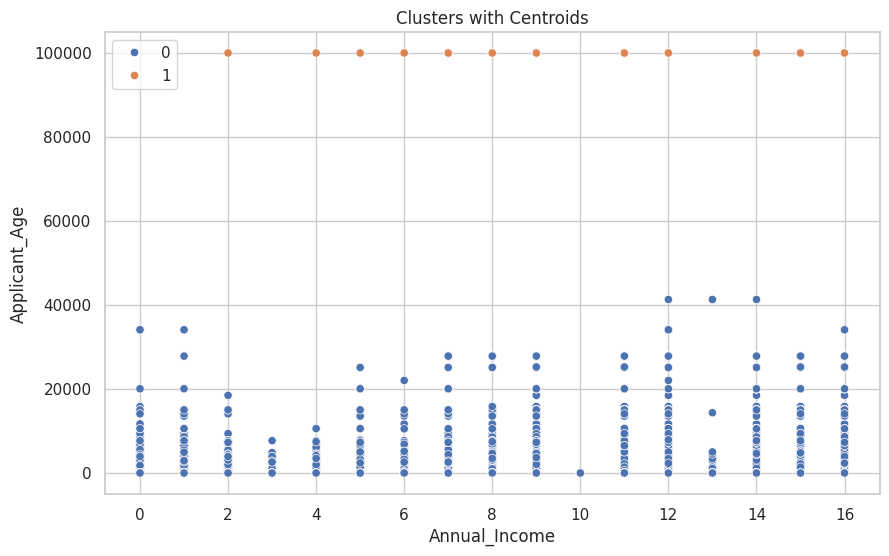

time: 9.6 s (started: 2024-03-05 11:45:25 +00:00)


In [ ]:
# Assign cluster labels to the DataFrame
df_ppd1['Cluster_Label'] = km_2cluster_model

# Plot the scatter plot with clusters and centroids
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_ppd1, x='education_code', y='gains', hue='Cluster_Label', legend='full')

# Set plot title and labels
plt.title('Clusters with Centroids')
plt.xlabel('Annual_Income')
plt.ylabel('Applicant_Age')
plt.legend()
plt.grid(True)
%memit
plt.show()


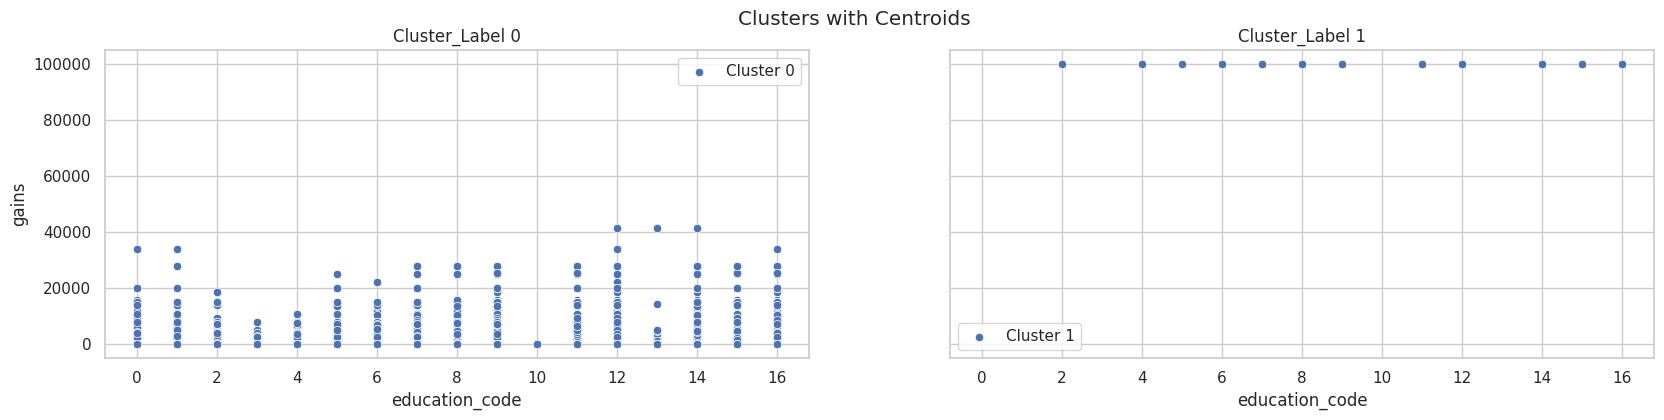

peak memory: 1216.91 MiB, increment: 0.00 MiB
time: 2.89 s (started: 2024-03-05 11:45:34 +00:00)


In [ ]:
# Create subplots for each cluster
fig, axes = plt.subplots(1, 2, figsize=(20, 4), sharex=True, sharey=True)
fig.suptitle('Clusters with Centroids')

# Iterate through each cluster
for i in range(2):
    # Filter data points belonging to the current cluster
    cluster_data = df_ppd1[df_ppd1['Cluster_Label'] == i]

    # Scatter plot of data points
    sns.scatterplot(data=cluster_data, x='education_code', y='gains', ax=axes[i], label=f'Cluster {i}')

    # Set title and labels for each subplot
    axes[i].set_title(f'Cluster_Label {i}')
    axes[i].set_xlabel('education_code')
    axes[i].set_ylabel('gains')
    axes[i].legend()

plt.show()
%memit

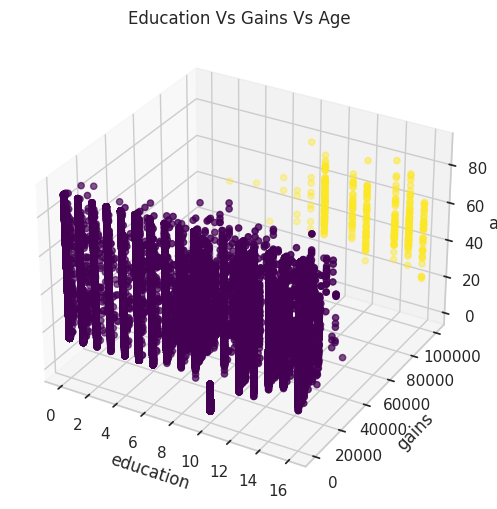

time: 7.75 s (started: 2024-03-05 12:05:28 +00:00)


In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Plot different combinations of non-categorical variables in 3D
fig = plt.figure(figsize=(15, 10))

# Plot 1: Age vs Wage_per_hour vs Working_week_per_year
ax1 = fig.add_subplot(231, projection='3d')
ax1.scatter(df_ppd1['education_code'], df_ppd1['gains'], df_ppd1['age'], c=df_ppd1['Cluster_Label'], cmap='viridis')
ax1.set_xlabel('education')
ax1.set_ylabel('gains')
ax1.set_zlabel('age')
ax1.set_title('Education Vs Gains Vs Age ')

plt.tight_layout()
plt.show()


#**Gaussian Mixture Model (GMM) Clustering:**
- A GMM with a specified number of components was initialized and fitted to the preprocessed data. The number of components was set to 2 for this analysis.
- The GMM assigns cluster labels to each data point based on their probabilistic assignment to each cluster.

**Cluster Evaluation:**
- Two clustering evaluation metrics were calculated: Silhouette Score and Davies-Bouldin Score.
    - **Silhouette Score:** The Silhouette Score measures the similarity of each data point to its assigned cluster compared to other clusters. A higher score indicates better-defined clusters.
    - **Davies-Bouldin Score:** The Davies-Bouldin Score measures the average similarity between each cluster and its most similar cluster. A lower score suggests better clustering.

**Results:**
- Silhouette Score: 0.2483
- Davies-Bouldin Score: 2.1087


**Cluster Visualization:**
- A scatter plot was generated to visualize the clusters produced by the GMM.
- Each cluster is represented by a distinct color, with data points plotted based on their standardized values on the first two features.
- The plot provides insight into the distribution and separation of clusters in the dataset.


**Recommendations:**
- Based on the Silhouette Score and Davies-Bouldin Score, the clustering performance can be considered moderate.
- Further analysis, such as experimenting with different numbers of components or exploring alternative clustering algorithms, may improve clustering results.
- It's important to interpret the clusters and their characteristics in the context of the specific dataset and domain knowledge.


**Conclusion:**
- Gaussian Mixture Model clustering was applied to the dataset, resulting in the formation of clusters based on the underlying patterns in the data.
- Evaluation metrics and visualization techniques were employed to assess the quality of the clustering and gain insights into the structure of the dataset.
- This analysis provides a foundation for understanding the data's inherent grouping and may inform decision-making processes in relevant applications.



In [ ]:
df_ppd1.columns

Index(['gender_code', 'education_code', 'class_code',
       'education_institute_code', 'marital_status_code', 'race_code',
       'is_hispanic_code', 'employment_commitment_code',
       'unemployment_reason_code', 'is_labor_union_code',
       'industry_code_main_code', 'occupation_code_main_code',
       'household_stat_code', 'household_summary_code', 'under_18_family_code',
       'veterans_admin_questionnaire_code', 'tax_status_code',
       'citizenship_code', 'country_of_birth_own_code',
       'country_of_birth_father_code', 'country_of_birth_mother_code',
       'migration_code_change_in_msa_code', 'migration_prev_sunbelt_code',
       'migration_code_move_within_reg_code',
       'migration_code_change_in_reg_code', 'residence_1_year_ago_code',
       'old_residence_reg_code', 'old_residence_state_code',
       'income_above_limit_code', 'age', 'employment_stat', 'wage_per_hour',
       'working_week_per_year', 'industry_code', 'occupation_code',
       'total_employed', 'v

time: 5.63 ms (started: 2024-03-05 11:45:44 +00:00)


In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Measure memory before plotting
%memit

# DataFrame with preprocessed data:'df2'
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_ppd1)

# Initialize and fit the Gaussian Mixture Model
n_components = 2 # You can adjust the number of components/clusters
gmm = GaussianMixture(n_components=n_components, random_state=142)
gmm.fit(X_scaled)

# Get cluster labels
cluster_labels = gmm.predict(X_scaled)

# Measure memory after plotting
%memit

# Add cluster labels to the DataFrame
df_ppd1['Cluster'] = cluster_labels

# Display the DataFrame with cluster labels
df_ppd1['Cluster']

peak memory: 1423.85 MiB, increment: 0.00 MiB
peak memory: 1423.86 MiB, increment: 0.00 MiB


0         1
1         1
2         1
3         1
4         1
         ..
209494    1
209495    1
209496    1
209497    1
209498    0
Name: Cluster, Length: 209499, dtype: int64

time: 6.72 s (started: 2024-03-05 12:07:45 +00:00)


In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Calculate silhouette score
silhouette_score_value = silhouette_score(X_scaled, cluster_labels)

# Calculate Davies-Bouldin score
davies_bouldin_score_value = davies_bouldin_score(X_scaled, cluster_labels)

print("Silhouette Score:", silhouette_score_value)
print("Davies-Bouldin Score:", davies_bouldin_score_value)

Silhouette Score: 0.2483315493072012
Davies-Bouldin Score: 2.1086812415459524
time: 13min 16s (started: 2024-03-05 11:45:50 +00:00)


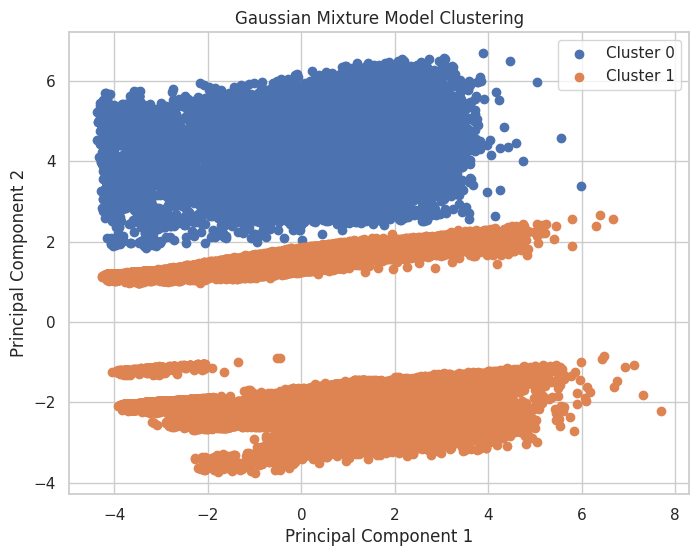

time: 5.33 s (started: 2024-03-05 13:31:17 +00:00)


In [ ]:
from sklearn.decomposition import PCA

# Fit PCA on the scaled data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters using PCA components
plt.figure(figsize=(8, 6))

# Scatter plot for each cluster
for cluster in range(n_components):
    cluster_data = X_pca[cluster_labels == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}')

plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


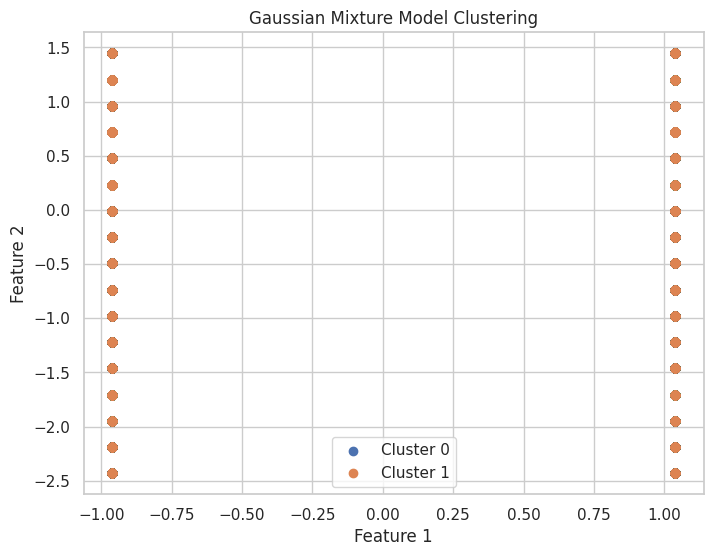

time: 14 s (started: 2024-03-05 13:50:30 +00:00)


In [ ]:
# Earlier in your code, you define and fit your Gaussian Mixture Model and standardize your data
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Assume df_ppd1 is your preprocessed DataFrame
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_ppd1)

n_components = 2  # Define the number of components for GMM
gmm = GaussianMixture(n_components=n_components, random_state=142)
gmm.fit(X_scaled)
cluster_labels = gmm.predict(X_scaled)

# Now you have X_scaled available, and you can proceed to plotting

# Plotting code
import matplotlib.pyplot as plt

# Define the number of components
n_components = 2  # You can adjust this according to your Gaussian Mixture Model

# Plot the clusters
plt.figure(figsize=(8, 6))

# Scatter plot for each cluster
for cluster in range(n_components):
    cluster_data = X_scaled[cluster_labels == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}')

plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()



#**Compare and contrasting the results of K-means clustering and Gaussian Mixture Model (GMM) clustering**

1. **Number of Clusters**:
   - K-means: Evaluated with 2, 3, 4, and 5 clusters.
   - GMM: Evaluated with 2 clusters.

2. **Silhouette Score (SS)**:
   - K-means: Achieved high SS values ranging from approximately 0.87 to 0.98 across different cluster configurations.
   - GMM: Obtained a moderate SS value of 0.2483.

3. **Davies-Bouldin Index (DBI)**:
   - K-means: Achieved low DBI values ranging from approximately 0.08 to 0.65.
   - GMM: Obtained a moderate DBI value of 2.1087.

4. **Interpretation**:
   - K-means: Generally produced clusters with high cohesion and separation, as indicated by high SS and low DBI values. The clusters were well-defined and compact, suitable for further analysis.
   - GMM: Produced clusters with moderate separation and cohesion. While the clusters were somewhat distinguishable, they may not be as well-separated or compact as desired.

5. **Cluster Visualization**:
   - K-means: Cluster visualization was not provided, but the analysis indicated well-separated clusters with high cohesion.
   - GMM: A scatter plot was generated to visualize clusters, providing insight into their distribution and separation.

6. **Recommendations**:
   - K-means: Further analysis recommended experimenting with different numbers of clusters or exploring alternative clustering algorithms to potentially improve clustering results, although the achieved results were generally robust and reliable.
   - GMM: Further analysis recommended to improve clustering performance, such as experimenting with different numbers of components or exploring alternative algorithms.

7. **Conclusion**:
   - K-means: Produced robust clustering solutions with well-defined clusters suitable for further analysis and interpretation.
   - GMM: Produced clusters with moderate separation and cohesion, suggesting room for improvement in clustering performance.

In summary, both K-means and GMM clustering algorithms were applied to the dataset, with K-means generally outperforming GMM in terms of clustering quality, as indicated by higher SS and lower DBI values. K-means produced well-defined and compact clusters, while GMM resulted in clusters with moderate separation and cohesion. Further analysis and experimentation were recommended for both algorithms to potentially improve clustering results.